Use june 14 nowcast restart as cold and hot start for my nowcast, by calculating the rms error, to determine the spin up days.

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime 
import os
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
from salishsea_tools.nowcast import analyze
from IPython.core.display import Image
from __future__ import division, print_function
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
sites = {
    'Sandheads': {
        'lat': 49.10,
        'lon': -123.30,
        'i' : 77,##426 start from 349 fortran start from 350
        'j' : 34,##293 start from 259 fortran start from 260
    },
    'VENUS East':{
        'lat' : 49.0419,
        'lon' : -123.3176,
        'depth' : 170,
        'i' : 67,
        'j' : 24
    },    
    'VENUS Central': {
        'lat': 49.0401,
        'lon': -123.4261,
        'depth' : 300,
        'i': 75,
        'j': 7
        },

    'VENUS Delta': {
        'lat': 49.0807167,
        'lon': -123.3400617,
        'i':  76,
        'j':25
    },
    'S4-3':{
        'lat': 49.25 ,
        'lon':  -123.375,
        'i':112,
        'j': 41
        },
    }
# Font format
title_font = {
    'fontname': 'Bitstream Vera Sans', 'size': '20', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'Bitstream Vera Sans', 'size': '18'}

In [3]:
## load both results
to = datetime.datetime(2015,6,15)
tf = datetime.datetime(2015,6,29)
directories=['15days_nowcast_coldstart14', '15days_nowcast_restart14']
base='/data/jieliu/MEOPAR/river-treatment/'
base_original = '/data/dlatorne/MEOPAR/SalishSea/nowcast/';## this is to combine days
ufile_patterns = ['{}/1hnowcastallthesame06150629gridU.nc','{}/1hnowcastrestart06150629gridU.nc']
vfile_patterns = ['{}/1hnowcastallthesame06150629gridV.nc','{}/1hnowcastrestart06150629gridV.nc']
Us={};Vs={}; 
##load results of both cold start and hot start
for directory, u_pattern, v_pattern in zip(directories, ufile_patterns, vfile_patterns):
    path = os.path.join(base,u_pattern.format(directory))
    f = nc.Dataset(path,'r');
    Us[directory] = f.variables['vozocrtx']
    path = os.path.join(base,v_pattern.format(directory))
    f = nc.Dataset(path,'r');
    Vs[directory] = f.variables['vomecrty']

In [4]:
def rms(station,  continue_flag = True,point_flag = True):
    """Plot rms for point station or for spatial averaged based on 
       point_flag"""

    if (continue_flag) & (point_flag):
        filess = analyze.get_filenames(to,tf,'1d','grid_T',base_original)
        none, time_dailyuse = analyze.combine_files(filess, 'vosaline',0,\
                        sites[station]['i']+349,sites[station]['j'] + 259)
        add_relative=np.zeros(time_dailyuse.shape)
        rms_relative=np.zeros(time_dailyuse.shape)
        z= 0

        ##for june 15 to 29
        for i in np.arange(0, 360, 24):
            for j in np.arange(24):
                jj= i+j
                add_relative[z] = add_relative[z] +\
                (Us[directories[0]][jj, 0,sites[station]['i'], sites[station]['j']]\
                 -Us[directories[1]][jj, 0,sites[station]['i'],sites[station]['j']])**2\
                +(Vs[directories[0]][jj, 0,sites[station]['i'], sites[station]['j']]\
                  -Vs[directories[1]][jj,0, sites[station]['i'],sites[station]['j']])**2
            z = z+1
        rms_relative[:] = np.sqrt(add_relative[:]/24) 
        
    ## plot
    fig, axs = plt.subplots(1, 1, figsize=(12, 4))    
    
    axs.plot(time_dailyuse, rms_relative, linewidth = 2, marker ='.', color ='indigo')
    axs.grid('on')
    axs.set_ylim([0,0.6])
    axs.set_ylabel('RMS', **axis_font)
    
    return fig, rms_relative        

array([ 0.23263798,  0.11644472,  0.12030681,  0.06906104,  0.06489775,
        0.04325219,  0.05024695,  0.06896261,  0.0535872 ,  0.05792291,
        0.04380591,  0.03194063,  0.03145912,  0.02173737,  0.03843463])

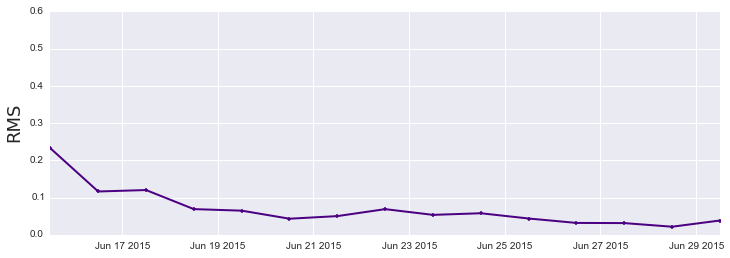

In [5]:
fig,rms_relative = rms( 'Sandheads', continue_flag = True,point_flag = True)
rms_relative

array([ 0.22504643,  0.14721292,  0.10555672,  0.15543632,  0.14295823,
        0.09158634,  0.05786876,  0.06414812,  0.06875531,  0.10745138,
        0.14206081,  0.09800373,  0.04005354,  0.06260892,  0.08712515])

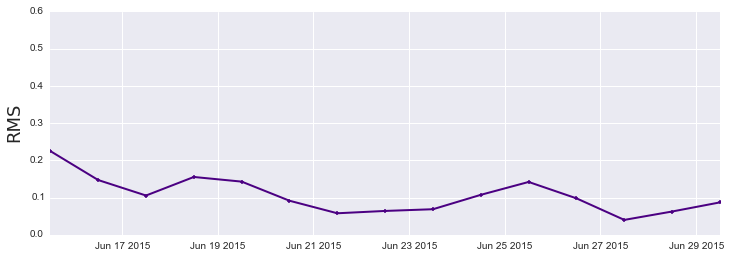

In [6]:
fig,rms_relative = rms( 'VENUS Central', continue_flag = True,point_flag = True)
rms_relative

array([ 0.27308346,  0.17916495,  0.14911849,  0.11136834,  0.09797495,
        0.05936056,  0.06563617,  0.05667043,  0.06875682,  0.10491188,
        0.08464142,  0.0549592 ,  0.05000199,  0.03944084,  0.10464963])

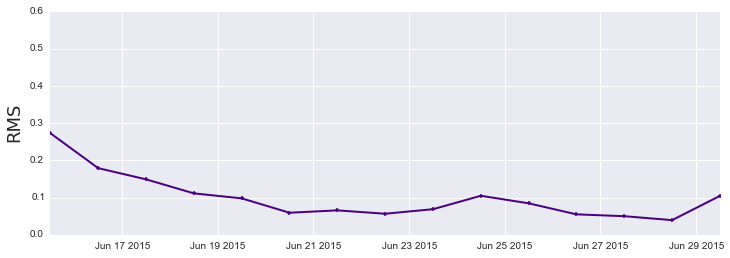

In [7]:
fig,rms_relative = rms( 'VENUS East', continue_flag = True,point_flag = True)
rms_relative

array([ 0.22726778,  0.18041411,  0.1733016 ,  0.10192882,  0.07503968,
        0.06338324,  0.06212719,  0.05956978,  0.05879021,  0.0809454 ,
        0.06022055,  0.04502652,  0.03915553,  0.02986608,  0.15409312])

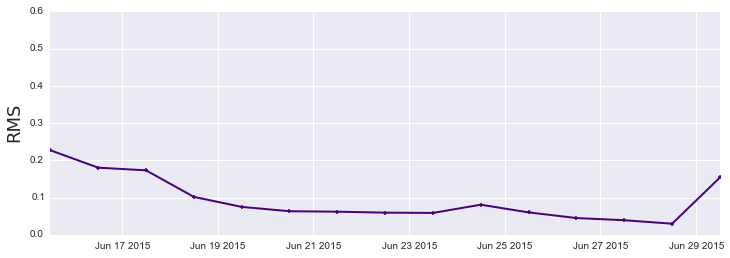

In [8]:
fig,rms_relative = rms( 'VENUS Delta', continue_flag = True,point_flag = True)
rms_relative

array([ 0.17765821,  0.12875725,  0.11351994,  0.07041394,  0.07167863,
        0.0724668 ,  0.09498472,  0.08092247,  0.03453409,  0.03069289,
        0.02030892,  0.02048272,  0.02162487,  0.02284351,  0.06279745])

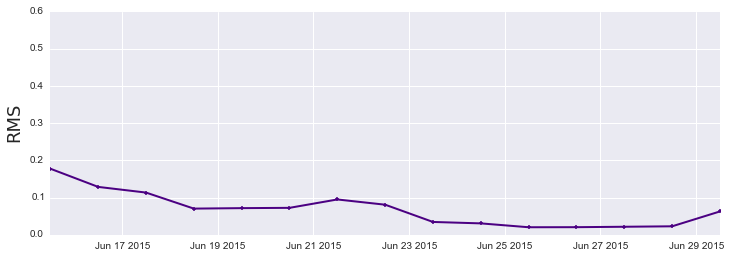

In [9]:
fig,rms_relative = rms( 'S4-3', continue_flag = True,point_flag = True)
rms_relative

* Spin up error doesn't look good at the last time step.